Part II

In [0]:
"""
esupatae
juwong
"""

'\nesupatae\njuwong\n'

In [0]:
import urllib.request as urllib2
import numpy as np
import matplotlib as matplot
import matplotlib.pyplot as plot
import matplotlib.image as mpimg
import matplotlib.colors as mpcolors

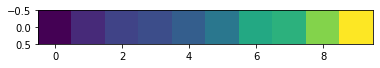

In [5]:
def make_incremental_array(n):
  arr = np.random.random(n)
  arr = np.sort(arr)
  arr = np.reshape(arr, (1,n))
  return arr

arr= make_incremental_array(10)
plot.imshow(arr)

In [0]:
def make_vector_arr(m, n):
  vector = []
  for i in range(m):
    vector.append(np.ravel(make_incremental_array(n)))
  arr = np.array(vector)
  return arr

In [0]:
def adjust_saturation(img, perc):
  img_hsv = mpcolors.rgb_to_hsv(img)
  for i in range(0, img_hsv.shape[0]):
    for j in range(0, img_hsv.shape[1]):
        img_hsv[i,j,1] = img_hsv[i,j,1] * ((100 + perc) / 100)
  img = mpcolors.hsv_to_rgb(img_hsv)
  img = img.astype(int)
  return (img)

In [0]:
def adjust_light(img, perc, threshold):
  img_hsv = mpcolors.rgb_to_hsv(img)
  for i in range(0, img_hsv.shape[0]):
    for j in range(0, img_hsv.shape[1]):
      if (img_hsv[i,j,2] > (threshold / 100.)):
        img_hsv[i,j,2] = img_hsv[i,j,2] * ((100 + perc) / 100)
  img = mpcolors.hsv_to_rgb(img_hsv)
  img = img.astype(int)
  return (img)

In [0]:
def add_color(img, color, perc):
  for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
      for k in range(0, img.shape[2]):
        diff = color[k] - img[i,j,k]
        img[i,j,k] = img[i,j,k] + diff * perc / 100
  img = img.astype(int)
  return (img)

In [0]:
def apply_vignette(img):
  img_hsv = mpcolors.rgb_to_hsv(img)
  center_x = img.shape[0] / 2
  center_y = img.shape[1] / 2
  for i in range(0, img_hsv.shape[0]):
    for j in range(0, img_hsv.shape[1]):
      diff = ((i - center_x)**2) / (center_x**2) + ((j - center_y)**2) / (center_y**2)
      if (diff > 0.95):
        img_hsv[i,j,2] = img_hsv[i,j,2] * (1 - (diff - 0.95)**(1.2))
  img = mpcolors.hsv_to_rgb(img_hsv)
  img = img.astype(int)
  return (img)

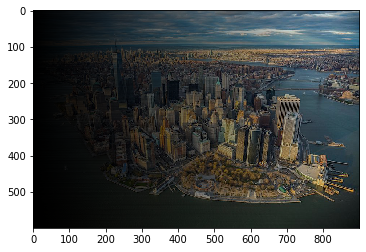

In [17]:
url = 'https://eldardev.s3.us-east-2.amazonaws.com/newyork.jpg'
img_readonly = mpimg.imread(urllib2.urlopen(url), format='jpeg')
filter_to_apply = make_vector_arr(img.shape[0], img.shape[1])
img = np.copy(img_readonly)

def apply_filter(img, filter_to_apply):
  for i in range(0, img.shape[2]):
    img[:, :, i] = img[:, :, i] * filter_to_apply
  return (img)

img = apply_filter(img, filter_to_apply)
plot.imshow(img)
plot.show()

# Filter No 1 (HUDSON)

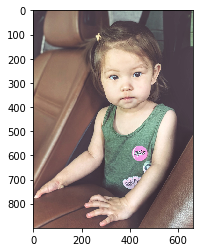

(900, 662, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


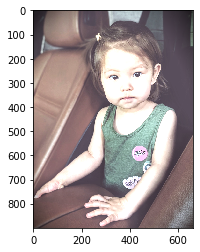

In [224]:
url = 'https://eldardev.s3.us-east-2.amazonaws.com/liana.jpg'
img_readonly = mpimg.imread(urllib2.urlopen(url), format='jpeg')
img = np.copy(img_readonly)
plot.imshow(img)
plot.show()
img = adjust_saturation(img, -20)
img = adjust_light(img, 20, 80)
# Add more blue
img[:, :, 2] = img[:, :, 2] * 1.05
plot.imshow(img)
plot.show()

# Filter No 2 (VALENCIA)

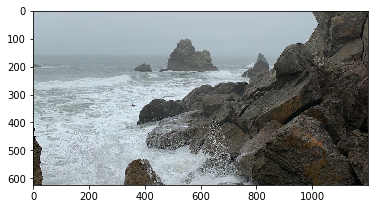

(624, 1200, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


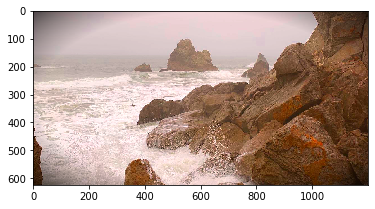

In [223]:
url = 'https://eldardev.s3.us-east-2.amazonaws.com/coast.jpg'
img_readonly = mpimg.imread(urllib2.urlopen(url), format='jpeg')
img = np.copy(img_readonly)
plot.imshow(img)
plot.show()
img = adjust_saturation(img, 100)
img = adjust_light(img, 50, 50)
img = add_color(img, [210,105,30], 25)
img[:, :, 1] = img[:, :, 1] * 0.90
img[:, :, 2] = img[:, :, 2] * 0.90
plot.imshow(img)
plot.show()

# Filter No 3 (EARLYBIRD)

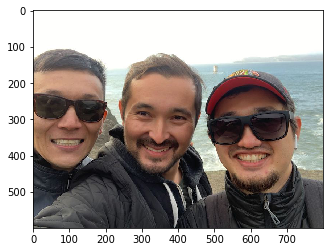

(600, 800, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


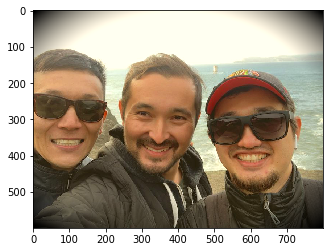

In [234]:
url = 'https://eldardev.s3.us-east-2.amazonaws.com/baldar.jpg'
img_readonly = mpimg.imread(urllib2.urlopen(url), format='jpeg')
img = np.copy(img_readonly)
plot.imshow(img)
plot.show()
img = adjust_saturation(img, 10)
img = adjust_light(img, 10, 0)
img = add_color(img, [218,165,32], 15)
img = apply_vignette(img)
plot.imshow(img)
plot.show()

# FILTERS 4, 5, 6 (SIERRA, WALDEN, INKWELL)

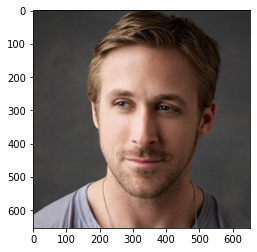

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


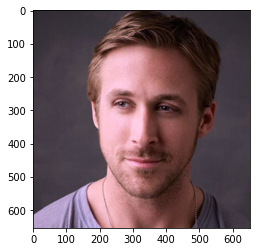

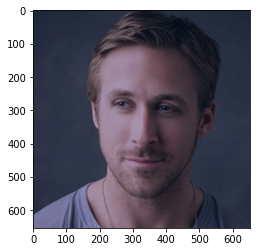

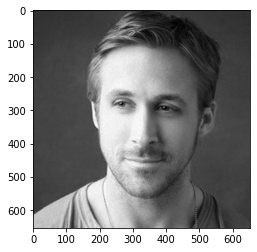

In [239]:
url = 'https://eldardev.s3.us-east-2.amazonaws.com/ryan.jpg'
img_readonly = mpimg.imread(urllib2.urlopen(url), format='jpeg')
img = np.copy(img_readonly)
plot.imshow(img)
plot.show()

def sierra_filter(img):
  g = img[:,:,1] * .9
  b = img[:,:,2] * 1.05
  #img = add_color(img, [50, 0, 0], 20)
  img[:,:,1] = g
  img[:,:,2] = b
  img = adjust_light(img, 5, 10)
  return (img)

plot.imshow(sierra_filter(img))
plot.show()

def walden_filter(img):
  #img = adjust_saturation(img, 20)
  img = adjust_light(img, -10, 100)
  img = add_color(img, [0, 50 ,100], 25)
  #img = adjust_saturation(img, 150)
  return (img)

plot.imshow(walden_filter(img))
plot.show()

def inkwell_filter(img):
  img = adjust_saturation(img, -100)
  return (img)

plot.imshow(inkwell_filter(img))
plot.show()

# SPECIAL FILTER (LYANNA)

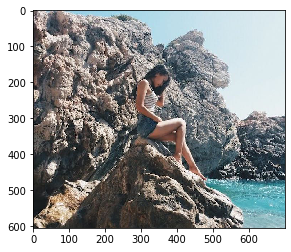

(605, 700, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


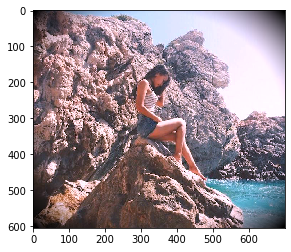

In [256]:
url = 'https://eldardev.s3.us-east-2.amazonaws.com/aiperi.jpg'
img_readonly = mpimg.imread(urllib2.urlopen(url), format='jpeg')
img = np.copy(img_readonly)
plot.imshow(img)
plot.show()

def lyanna_filter(img):
  img = adjust_light(img, -10, 80)
  img = adjust_saturation(img, 20)
  img = add_color(img, [244,164,96], 10)
  img = adjust_light(img, 20, 0)
  # bring up the reds and blues a little bit
  img[:,:,0] = img[:,:,0] * 1.1
  img[:,:,2] = img[:,:,2] * 1.15
  img = apply_vignette(img)
  return (img)

plot.imshow(lyanna_filter(img))
plot.show()